# Independent Neuron

In this notebook we removed the adjecent and overlapping pixels from different neurons.
<br>Note part of the code is from example code of the competition (https://github.com/codeneuro/neurofinder-datasets/blob/master/example.py)

In [1]:
%matplotlib inline
import json
import matplotlib.pyplot as plt
from numpy import array, zeros
from scipy.misc import imread
from glob import glob

In [2]:
# load the images
files = sorted(glob('data/images/*.tiff'))
imgs = array([imread(f) for f in files[:50]])
dims = imgs.shape[1:]

# load the regions (training data only)
with open('data/regions/regions.json') as f:
    regions = json.load(f)

In [35]:
def to_tuple(li):
    """Transform list of lists to list of tuples"""
    new_li = []
    for l in li:
        li_tuple = []
        for coor in l:
            li_tuple.append(tuple(coor))
        new_li.append(li_tuple)
    return new_li   

In [54]:
def all_coordinates(li):
    """Get all coordinates and return a set of tuples"""
    new_li = []
    for l in li:
        for item in l:
            new_li.append(item)
    return set(new_li)

In [78]:
def not_adjacent(tu,rest_coor):
    """Check if tuple tu is not adjacent with any tuple in set rest_coor
        return true if it is not adjacent"""
    not_ad = False
    if (tu[0]+1,tu[1]) not in rest_coor \
            and (tu[0]-1, tu[1]) not in rest_coor\
            and (tu[0]+1, tu[1]+1) not in rest_coor \
            and (tu[0]-1, tu[1]+1) not in rest_coor\
            and (tu[0],tu[1]+1) not in rest_coor \
            and (tu[0], tu[1]-1) not in rest_coor\
            and (tu[0]+1, tu[1]-1) not in rest_coor \
            and (tu[0]-1, tu[1]-1) not in rest_coor:
                not_ad = True

    return not_ad

def independent_neuron(li):
    """Remove overlapping and adjacent pixels"""
    new_li = []
    all_coor = all_coordinates(li)
    for i in range(len(li)):
        rest_coor = all_coor - set(li[i])
        new_sm_li = []
        for item in li[i]:
            if item not in rest_coor and not_adjacent(item,rest_coor):
                new_sm_li.append(item)
        new_li.append(new_sm_li)
    return new_li

In [79]:
def tomask(coords):
    """Create mask for a list of tuples(coordinates)"""
    mask = zeros(dims)
    for i in coords:
        mask[i] = 1
    return mask


In [96]:
# Get the independent coordinates
coordinates_list = to_tuple([s['coordinates'] for s in regions])
independent_coor = independent_neuron(coordinates_list)
print(len(independent_coor))

330


In [94]:
# Demonstrate there is no complete overlapping neurons
li = sorted(coordinates_list)
import itertools
new_li = list(li for li,_ in itertools.groupby(li))
print(len(new_li),len(regions))

330 330


In [83]:
# Create the mask
masks = array([tomask(s) for s in independent_coor])

In [93]:
masks.shape

(330, 512, 512)

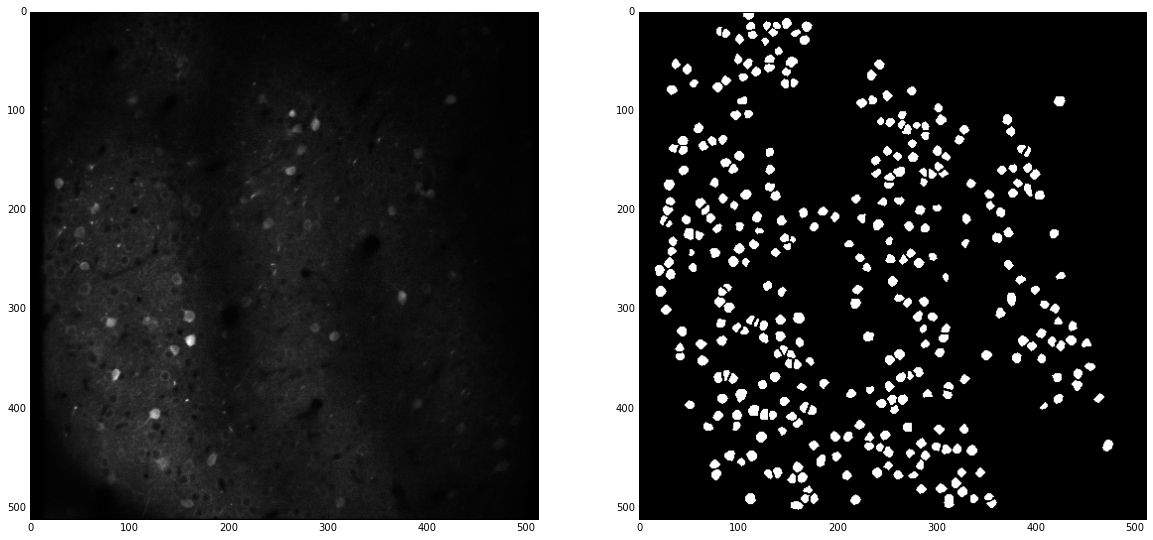

In [85]:
# show the outputs, the second pic shows the new neurons are not adjacent to each other
plt.figure(figsize=(20, 40))
plt.subplot(1, 2, 1)
plt.imshow(imgs.sum(axis=0), cmap='gray')
plt.subplot(1, 2, 2)
plt.imshow(masks.sum(axis=0), cmap='gray')
plt.savefig("mask.png")
plt.show()